In this section, we will perform an exploratoy analysis on the dataset generated in the 'Data Fetch.ipynb' file

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display

Let us load all the datasets into the memory.

In [2]:
playlists = pd.read_csv('datasets/playlists.csv')
playlists.drop(columns=['Unnamed: 0'], inplace=True)
playlists.rename({'id': 'playlist_id'}, axis='columns', inplace=True)
playlists.head()

,Collaborative,Description,Followers,Name,Tracks,URL,href,playlist_id
0,False,Panic! At The Disco is on top of the Hottest 50.,22325533,Today's Top Hits,50,https://open.spotify.com/playlist/37i9dQZF1DXc...,https://api.spotify.com/v1/playlists/37i9dQZF1...,37i9dQZF1DXcBWIGoYBM5M
1,False,New music from Future and Lil Pump.,10979083,RapCaviar,50,https://open.spotify.com/playlist/37i9dQZF1DX0...,https://api.spotify.com/v1/playlists/37i9dQZF1...,37i9dQZF1DX0XUsuxWHRQd
2,False,Dance music's biggest playlist with Dzeko,5372383,mint,50,https://open.spotify.com/playlist/37i9dQZF1DX4...,https://api.spotify.com/v1/playlists/37i9dQZF1...,37i9dQZF1DX4dyzvuaRJ0n
3,False,The hottest R&B tunes. Cover: Chris Brown,4773263,Are & Be,46,https://open.spotify.com/playlist/37i9dQZF1DX4...,https://api.spotify.com/v1/playlists/37i9dQZF1...,37i9dQZF1DX4SBhb3fqCJd
4,False,"New music from Imagine Dragons, along with the...",4418825,Rock This,52,https://open.spotify.com/playlist/37i9dQZF1DXc...,https://api.spotify.com/v1/playlists/37i9dQZF1...,37i9dQZF1DXcF6B6QPhFDv


In [3]:
playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
Collaborative    1485 non-null bool
Description      1329 non-null object
Followers        1485 non-null int64
Name             1485 non-null object
Tracks           1485 non-null int64
URL              1485 non-null object
href             1485 non-null object
playlist_id      1485 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 82.7+ KB


There are a few null values in the 'Description' field

In [4]:
tracksPlaylists = pd.read_csv('datasets/TracksPlaylist.csv')
tracksPlaylists.drop(columns=['Unnamed: 0'], inplace=True)
tracksPlaylists.head()

,Playlist,Track
0,37i9dQZF1DXcBWIGoYBM5M,6MWtB6iiXyIwun0YzU6DFP
1,37i9dQZF1DXcBWIGoYBM5M,25sgk305KZfyuqVBQIahim
2,37i9dQZF1DXcBWIGoYBM5M,5p7ujcrUXASCNwRaWNHR1C
3,37i9dQZF1DXcBWIGoYBM5M,7vGGAJBkHKxKtOnGjQduDV
4,37i9dQZF1DXcBWIGoYBM5M,5JEx7HbmvHQQswJCsoo9rA


In [5]:
tracksPlaylists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81497 entries, 0 to 81496
Data columns (total 2 columns):
Playlist    81497 non-null object
Track       81490 non-null object
dtypes: object(2)
memory usage: 1.2+ MB


Some playlists have no tracks, these would be excluded from our analysis

In [6]:
tracksInfo = pd.read_csv('datasets/allTracksInfo.csv')
tracksInfo.drop(columns=['Unnamed: 0'], inplace=True)
tracksInfo.head()

,acousticness,analysis_url,artist_id,artist_name,available_markets,danceability,duration_ms,energy,explicit,id,...,mode,name,popularity,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.635,https://api.spotify.com/v1/audio-analysis/7vGG...,6LuN9FCkKOj5PcnpouEgny,Khalid,78,0.540,209546,0.439,False,7vGGAJBkHKxKtOnGjQduDV,...,1.0,Saturday Nights,89,0.1150,167.908,4.0,https://api.spotify.com/v1/tracks/7vGGAJBkHKxK...,audio_features,spotify:track:7vGGAJBkHKxKtOnGjQduDV,0.371
1,0.163,https://api.spotify.com/v1/audio-analysis/6MWt...,246dkjvS1zLTtiykXe5h60,Post Malone,78,0.833,149520,0.539,True,6MWtB6iiXyIwun0YzU6DFP,...,0.0,Wow.,95,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385
2,0.297,https://api.spotify.com/v1/audio-analysis/5p7u...,26VFTg2z8YR0cCuwLzESi2,Halsey,78,0.752,201660,0.488,True,5p7ujcrUXASCNwRaWNHR1C,...,1.0,Without Me,97,0.0705,136.041,4.0,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533
3,0.193,https://api.spotify.com/v1/audio-analysis/1rqq...,20JZFwl6HVl6yg8a4H3ZqK,Panic! At The Disco,78,0.579,190946,0.904,False,1rqqCSm0Qe4I9rUvWncaom,...,1.0,High Hopes,93,0.0618,82.014,4.0,https://api.spotify.com/v1/tracks/1rqqCSm0Qe4I...,audio_features,spotify:track:1rqqCSm0Qe4I9rUvWncaom,0.681
4,0.407,https://api.spotify.com/v1/audio-analysis/3Ol2...,31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie,78,0.791,179449,0.587,True,3Ol2xnObFdKV9pmRD2t9x8,...,0.0,Look Back At It,83,0.0413,96.057,4.0,https://api.spotify.com/v1/tracks/3Ol2xnObFdKV...,audio_features,spotify:track:3Ol2xnObFdKV9pmRD2t9x8,0.536


In [7]:
tracksInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81590 entries, 0 to 81589
Data columns (total 24 columns):
acousticness         81567 non-null float64
analysis_url         81567 non-null object
artist_id            81590 non-null object
artist_name          81585 non-null object
available_markets    81590 non-null int64
danceability         81567 non-null float64
duration_ms          81590 non-null int64
energy               81567 non-null float64
explicit             81590 non-null bool
id                   81567 non-null object
instrumentalness     81567 non-null float64
key                  81567 non-null float64
liveness             81567 non-null float64
loudness             81567 non-null float64
mode                 81567 non-null float64
name                 81586 non-null object
popularity           81590 non-null int64
speechiness          81567 non-null float64
tempo                81567 non-null float64
time_signature       81567 non-null float64
track_href           8156

In [8]:
artistInfo = pd.read_csv('datasets/allArtistsInfo.csv')
artistInfo.drop(columns='Unnamed: 0', inplace=True)
artistInfo.columns = ['artist_genres', 'artist_id', 'artist_name', 'artist_followers', 'artist_popularity']
artistInfo.drop_duplicates(subset='artist_id', keep='last', inplace=True)
artistInfo['artist_genres'] = artistInfo['artist_genres'].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace('"','')
artistInfo.reset_index(inplace=True)
artistInfo.drop(columns=['index'], inplace=True)
artistInfo.head()

,artist_genres,artist_id,artist_name,artist_followers,artist_popularity
0,"bachata, dance pop, latin, latin pop, pop, tro...",3MHaV05u0io8fQbZ2XPtlC,Prince Royce,3523540,84
1,"electro latino, latin, latin hip hop, pop, reg...",1wZtkThiXbVNtj6hee6dz9,Wisin & Yandel,2661478,82
2,"cumbia pop, latin pop, latin viral pop",5KQX0Ui06LVm6PApyicRFK,Rombai,744919,71
3,"reggaeton, reggaeton flow",4GAS1OgXh8D5pEA6s6eBNW,Valentino,76199,67
4,"latin, latin hip hop, latin pop, latin viral p...",3PAwspMN27PDm81WwXDsMf,Reykon,1142791,72


We will be using the genres of the artist in our analyis. The genre of the artist is assumed to be the genre of the song. In the below, we will create dummies for the 'artist_genres' field.

I have identified some common genres. If any of the genres in our dataset contains a word from these identified genres, it will be categorised as that. Otherwise, I will group in under the 'other' category.

In [9]:
genres = list(["pop", 'rock', 'folk', 'mellow', 
               'indie', 'rap', 'house', 'r&b', 'stomp and holler', 'singer-songwriter', 'edm', 
               'quiet storm', 'contemporary', 'christmas', 'funk', 'metal', 'alternative', 
               'adult standards', 'americana', 'soul', 'blues', 'hip hop', 'motown', 'punk', 'disco','other'])

def genre_search(artist,genres=genres):
    genre_list = np.zeros(len(genres))
    
    if artist[0] == '':
        return genre_list
    else:
        for i,genre in enumerate(genres):
            genre_list[i] = any(genre in s for s in artist)*1
        genre_list[i] = (genre_list.sum() == 0)*1
        return genre_list

artist_genres_dummy = []
for i in artistInfo.artist_genres:
    a = []
    a.append(i)
    artist_genres_dummy.append(genre_search(a))

In [10]:
artistInfo = pd.concat((artistInfo, pd.DataFrame(artist_genres_dummy, columns=genres)), axis=1)
artistInfo.head()

,artist_genres,artist_id,artist_name,artist_followers,artist_popularity,pop,rock,folk,mellow,indie,...,alternative,adult standards,americana,soul,blues,hip hop,motown,punk,disco,other
0,"bachata, dance pop, latin, latin pop, pop, tro...",3MHaV05u0io8fQbZ2XPtlC,Prince Royce,3523540,84,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"electro latino, latin, latin hip hop, pop, reg...",1wZtkThiXbVNtj6hee6dz9,Wisin & Yandel,2661478,82,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"cumbia pop, latin pop, latin viral pop",5KQX0Ui06LVm6PApyicRFK,Rombai,744919,71,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"reggaeton, reggaeton flow",4GAS1OgXh8D5pEA6s6eBNW,Valentino,76199,67,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,"latin, latin hip hop, latin pop, latin viral p...",3PAwspMN27PDm81WwXDsMf,Reykon,1142791,72,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The above dataset has dummies created. We will be using this in our analysis.

## Followers

Now let us look at the distribution of the followers. Let us create a histogram to see how the distribution looks like.

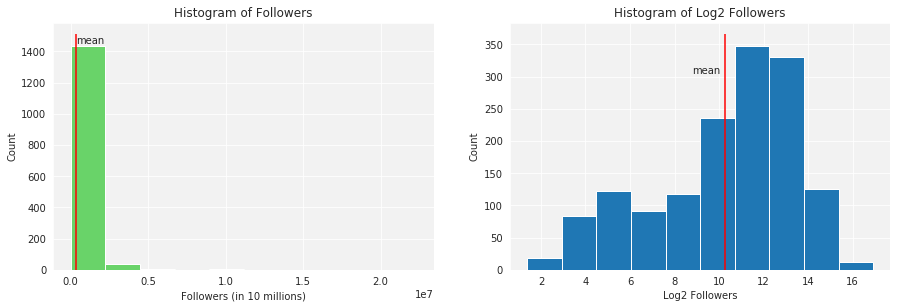

In [11]:
# Number of Followers on the Playlist
with sns.axes_style('darkgrid'):
    _ = plt.figure(figsize=(15,10))
    
    _ = plt.subplot(2,2,1)
    _ = plt.hist(playlists.Followers, color='#69d369')
    ax = plt.gca()
    ymin,ymax = ax.get_ylim()
    _ = plt.vlines(playlists.Followers.mean(),ymin,ymax,color='r')
    _ = ax.set_facecolor('#f2f2f2')
    _ = plt.xlabel('Followers (in 10 millions)')
    _ = plt.ylabel('Count')
    _ = plt.title('Histogram of Followers')
    _ = plt.text(playlists.Followers.mean() - 10,
             ymax/1.04,
             'mean')
    
    _ = plt.subplot(2,2,2)
    _ = plt.hist(np.log(playlists.Followers+1))
    ax = plt.gca()
    ymin,ymax = ax.get_ylim()
    _ = plt.vlines(np.log(playlists.Followers+1).mean(),ymin,ymax,color='r')
    _ = ax.set_facecolor('#f2f2f2')
    _ = plt.xlabel('Log2 Followers')
    _ = plt.ylabel('Count')
    _ = plt.title('Histogram of Log2 Followers')
    _ = plt.text(np.log(playlists.Followers+1).mean() - 1.5,
             ymax/1.2,
             'mean')
# Almost Normal when Log is Taken, otherwise it is rightly skewed

In [12]:
tracksPlaylists.dropna(inplace=True)
tracksPlaylists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81490 entries, 0 to 81496
Data columns (total 2 columns):
Playlist    81490 non-null object
Track       81490 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [13]:
tracksInfo.drop_duplicates(inplace=True)
trackPlaylistsInfo = pd.merge(tracksPlaylists, tracksInfo, left_on='Track', right_on='id')
trackPlaylistsInfo = pd.merge(trackPlaylistsInfo, playlists, left_on ='Playlist', right_on='playlist_id')
trackPlaylistsInfo = pd.merge(trackPlaylistsInfo, artistInfo, left_on='artist_id', right_on='artist_id')
trackPlaylistsInfo.head()

,Playlist,Track,acousticness,analysis_url,artist_id,artist_name_x,available_markets,danceability,duration_ms,energy,...,alternative,adult standards,americana,soul,blues,hip hop,motown,punk,disco,other
0,37i9dQZF1DXcBWIGoYBM5M,6MWtB6iiXyIwun0YzU6DFP,0.163,https://api.spotify.com/v1/audio-analysis/6MWt...,246dkjvS1zLTtiykXe5h60,Post Malone,78,0.833,149520,0.539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37i9dQZF1DXcBWIGoYBM5M,1A6OTy97kk0mMdm78rHsm8,0.551,https://api.spotify.com/v1/audio-analysis/1A6O...,246dkjvS1zLTtiykXe5h60,Post Malone,0,0.753,158053,0.498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37i9dQZF1DX0XUsuxWHRQd,6MWtB6iiXyIwun0YzU6DFP,0.163,https://api.spotify.com/v1/audio-analysis/6MWt...,246dkjvS1zLTtiykXe5h60,Post Malone,78,0.833,149520,0.539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37i9dQZF1DX2A29LI7xHn1,6MWtB6iiXyIwun0YzU6DFP,0.163,https://api.spotify.com/v1/audio-analysis/6MWt...,246dkjvS1zLTtiykXe5h60,Post Malone,78,0.833,149520,0.539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37i9dQZF1DX2A29LI7xHn1,1A6OTy97kk0mMdm78rHsm8,0.551,https://api.spotify.com/v1/audio-analysis/1A6O...,246dkjvS1zLTtiykXe5h60,Post Malone,0,0.753,158053,0.498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
trackPlaylistsInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80814 entries, 0 to 80813
Data columns (total 64 columns):
Playlist             80814 non-null object
Track                80814 non-null object
acousticness         80814 non-null float64
analysis_url         80814 non-null object
artist_id            80814 non-null object
artist_name_x        80809 non-null object
available_markets    80814 non-null int64
danceability         80814 non-null float64
duration_ms          80814 non-null int64
energy               80814 non-null float64
explicit             80814 non-null bool
id                   80814 non-null object
instrumentalness     80814 non-null float64
key                  80814 non-null float64
liveness             80814 non-null float64
loudness             80814 non-null float64
mode                 80814 non-null float64
name                 80810 non-null object
popularity           80814 non-null int64
speechiness          80814 non-null float64
tempo                80814 

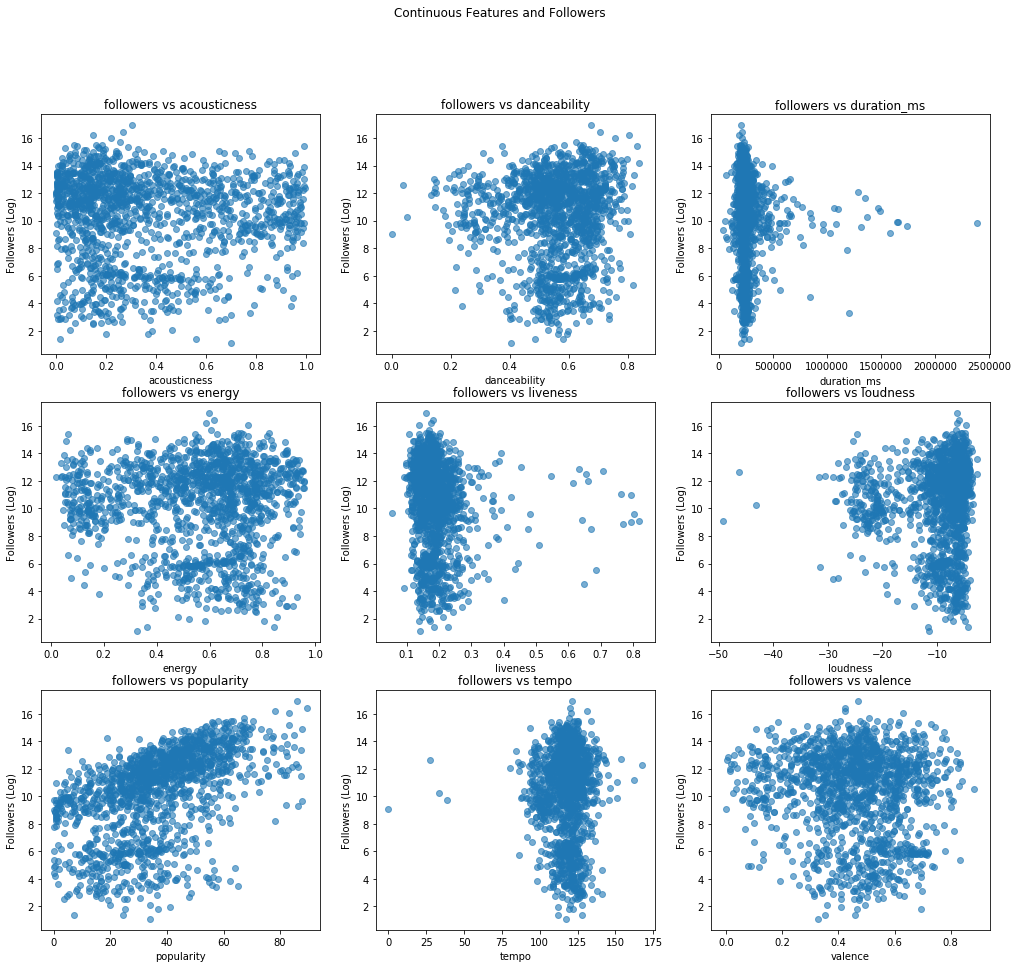

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [15]:
continuous_audio_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 
                  'loudness', 'popularity', 'tempo', 'valence', 'Followers']

trackPlaylistsInfo_continuous = trackPlaylistsInfo.groupby('Playlist').mean()[continuous_audio_features]

def figure(variable, a, b):
    with sns.axes_style('whitegrid'):
        plt.figure(figsize=(4,4));
        ax[a,b].scatter(trackPlaylistsInfo_continuous[variable], np.log(trackPlaylistsInfo_continuous['Followers']), alpha=0.6);
        ax[a,b].set_xlabel(variable);
        ax[a,b].set_ylabel('Followers (Log)');
        ax[a,b].set_title('followers vs ' + variable);
        
fig, ax = plt.subplots(3,3, figsize=(17,15));
plt.suptitle('Continuous Features and Followers');
figure('acousticness', 0, 0);
figure('danceability', 0, 1);
figure('duration_ms', 0, 2);
figure('energy', 1, 0);
figure('liveness', 1, 1);
figure('loudness', 1,2);
figure('popularity', 2, 0);
figure('tempo', 2, 1);
figure('valence', 2, 2);

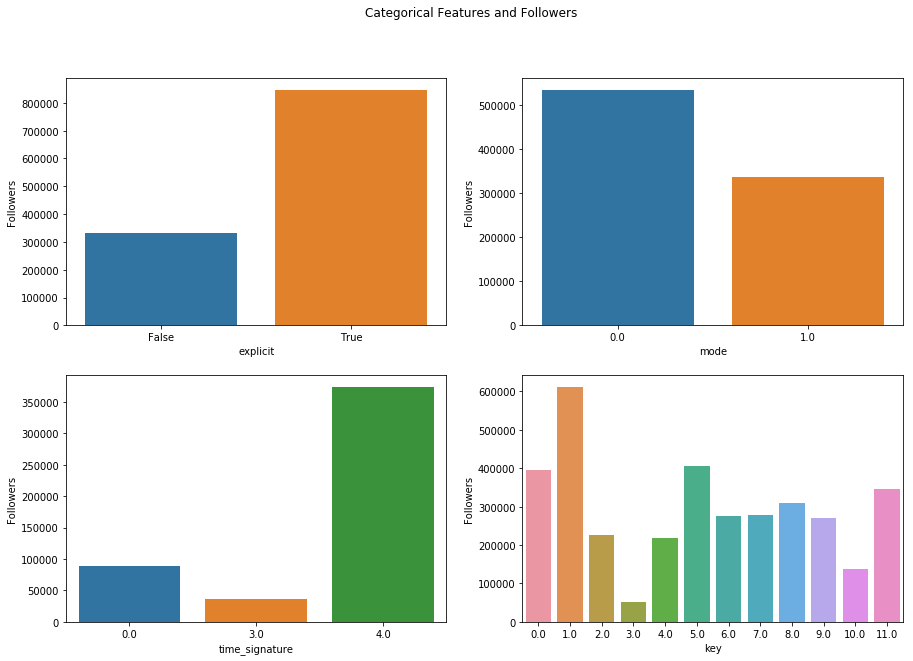

In [16]:
categorical_features = ['Playlist', 'Followers', 'explicit', 'mode', 'time_signature', 'key']
trackPlaylistsInfo_categorical = trackPlaylistsInfo[categorical_features].groupby('Playlist').agg(lambda x:x.value_counts().index[0])

fig, ax = plt.subplots(2,2, figsize=(15,10))
_ = sns.barplot(x='explicit',y='Followers',data=trackPlaylistsInfo_categorical.groupby('explicit').mean().reset_index(), ax=ax[0][0])
_ = sns.barplot(x='mode',y='Followers',data=trackPlaylistsInfo_categorical.groupby('mode').mean().reset_index(),ax=ax[0][1])
_ = sns.barplot(x='time_signature',y='Followers',data=trackPlaylistsInfo_categorical.groupby('time_signature').mean().reset_index(),ax=ax[1][0])
_ = sns.barplot(x='key',y='Followers',data=trackPlaylistsInfo_categorical.groupby('key').mean().reset_index(),ax=ax[1][1])
_ = plt.suptitle('Categorical Features and Followers')

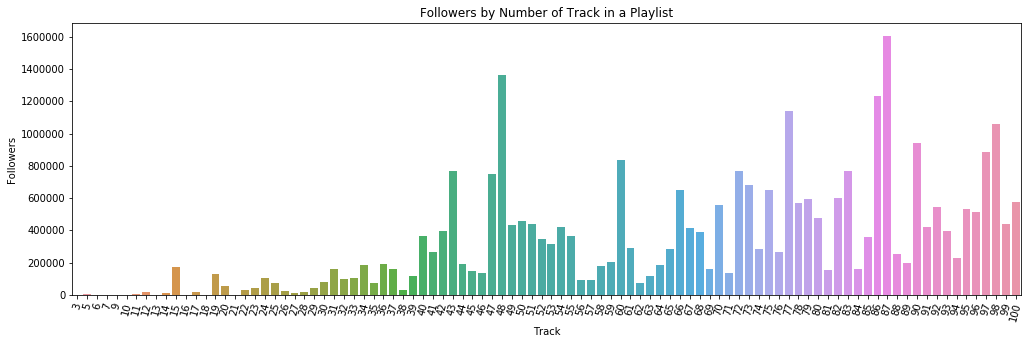

In [17]:
_ = plt.figure(figsize=(17,5))
_ = plt.title('Followers by Number of Track in a Playlist')
_ = sns.barplot(x='Track', y='Followers', data=trackPlaylistsInfo.groupby('Playlist').agg({'Track':'count', 'Followers':'mean'}).groupby('Track').mean().reset_index())
plt.xticks(rotation=75);

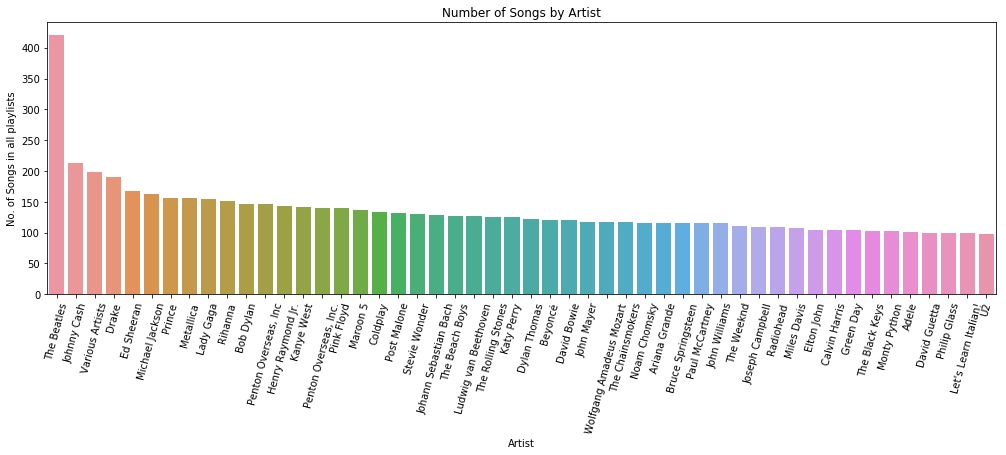

In [18]:
_ = plt.figure(figsize=(17,5))
_ = sns.barplot(x='artist_name_x', y='id', data=trackPlaylistsInfo.groupby('artist_name_x')[['id']].count().sort_values('id', ascending=False).head(50).reset_index())
_ = plt.xlabel('Artist')
_ = plt.ylabel('No. of Songs in all playlists')
_ = plt.title('Number of Songs by Artist')
plt.xticks(rotation=75);

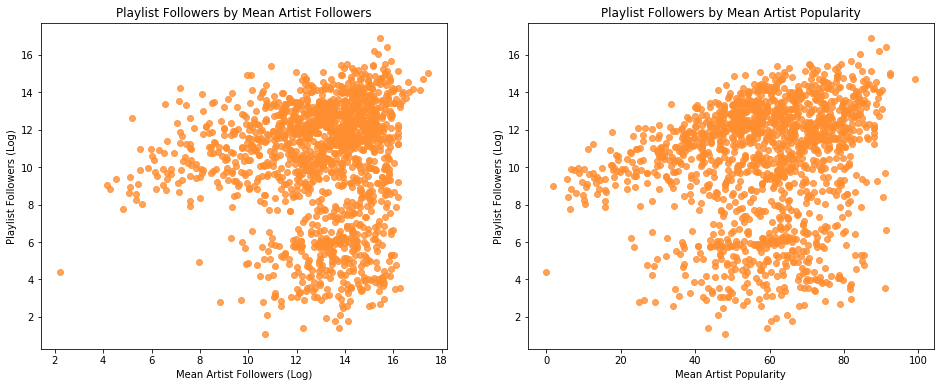

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,6));
_ = ax[0].scatter(np.log(trackPlaylistsInfo.groupby('Playlist').mean().artist_followers), np.log(trackPlaylistsInfo.groupby('Playlist').mean().Followers), alpha=0.8, color='#FF8E31');
_ = ax[0].set_xlabel('Mean Artist Followers (Log)')
_ = ax[0].set_ylabel('Playlist Followers (Log)')
_ = ax[0].set_title('Playlist Followers by Mean Artist Followers')

_ = ax[1].scatter(trackPlaylistsInfo.groupby('Playlist').mean().artist_popularity, np.log(trackPlaylistsInfo.groupby('Playlist').mean().Followers), alpha=0.8, color='#FF8E31');
_ = ax[1].set_xlabel('Mean Artist Popularity')
_ = ax[1].set_ylabel('Playlist Followers (Log)')
_ = ax[1].set_title('Playlist Followers by Mean Artist Popularity')

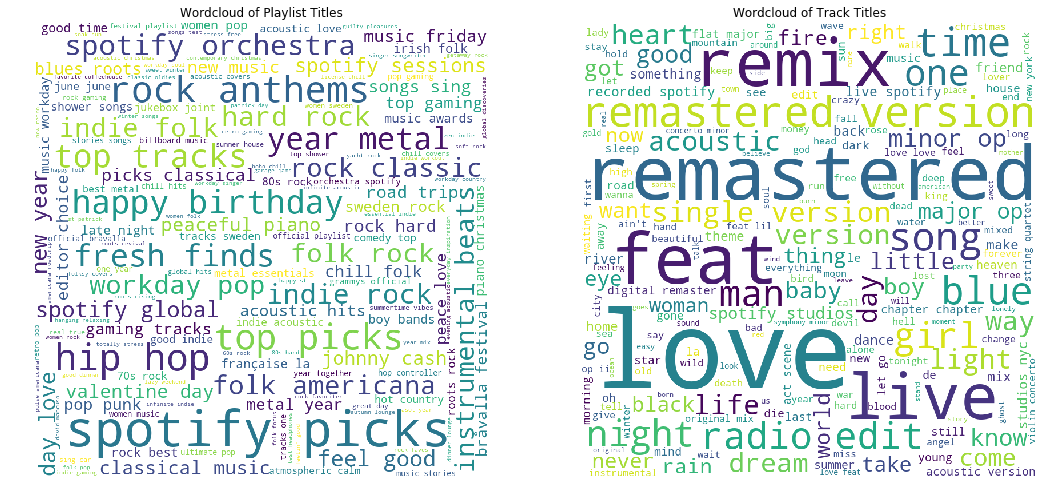

In [24]:
def wordCloudGenerator(var):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    for val in trackPlaylistsInfo[var]: 
        # typecaste each val to string 
        val = str(val) 
        # split the value 
        tokens = val.split() 
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '
            
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words)
    return wordcloud
    
# plot the WordCloud image
fig, ax = plt.subplots(1,2, figsize=(18,9), facecolor = None);

ax[0].imshow(wordCloudGenerator('Name')) 
ax[0].axis("off")
ax[0].set_title('Wordcloud of Playlist Titles');

ax[1].imshow(wordCloudGenerator('name')) 
ax[1].axis("off")
ax[1].set_title('Wordcloud of Track Titles');

In [20]:
#Tracks: remastered, live, feat, remix, radio
#Playlist: picks, top, finds

trackPlaylistsInfo['track_remast'] = trackPlaylistsInfo['name'].str.contains("remastered", case=False)*1
trackPlaylistsInfo['track_live'] = trackPlaylistsInfo['name'].str.contains("live", case=False)*1
trackPlaylistsInfo['track_feat'] = trackPlaylistsInfo['name'].str.contains("feat", case=False)*1
trackPlaylistsInfo['track_remix'] = trackPlaylistsInfo['name'].str.contains("remix", case=False)*1
trackPlaylistsInfo['track_radio'] = trackPlaylistsInfo['name'].str.contains("radio", case=False)*1

trackPlaylistsInfo['playlist_picks'] = trackPlaylistsInfo['Name'].str.contains("picks", case=False)*1
trackPlaylistsInfo['playlist_top'] = trackPlaylistsInfo['Name'].str.contains("top", case=False)*1
trackPlaylistsInfo['playlist_find'] = trackPlaylistsInfo['Name'].str.contains("find", case=False)*1

In [21]:
trackPlaylistsInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80814 entries, 0 to 80813
Data columns (total 72 columns):
Playlist             80814 non-null object
Track                80814 non-null object
acousticness         80814 non-null float64
analysis_url         80814 non-null object
artist_id            80814 non-null object
artist_name_x        80809 non-null object
available_markets    80814 non-null int64
danceability         80814 non-null float64
duration_ms          80814 non-null int64
energy               80814 non-null float64
explicit             80814 non-null bool
id                   80814 non-null object
instrumentalness     80814 non-null float64
key                  80814 non-null float64
liveness             80814 non-null float64
loudness             80814 non-null float64
mode                 80814 non-null float64
name                 80810 non-null object
popularity           80814 non-null int64
speechiness          80814 non-null float64
tempo                80814 

In [60]:
data = trackPlaylistsInfo[['Playlist', 'acousticness', 'danceability', 
                           'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
                          'mode', 'popularity', 'speechiness', 'tempo', 'time_signature',
                            'valence', 'Followers', 'artist_popularity', 'pop', 'rock',
                          'folk', 'mellow', 'indie', 'rap', 'house', 'r&b', 'stomp and holler',
                          'singer-songwriter', 'edm', 'quiet storm', 'contemporary', 'christmas',
                          'funk', 'metal', 'alternative', 'adult standards', 'americana', 'soul', 'blues',
                          'hip hop', 'motown', 'punk', 'disco', 'other', 'track_remast', 'track_live', 'track_feat',
                          'track_remix', 'track_radio', 'playlist_picks', 'playlist_top', 'playlist_find']]

In [59]:
continuous_features = ['Playlist', 'acousticness', 'danceability', 
                           'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
                          'popularity', 'speechiness', 'tempo',
                            'valence', 'Followers', 'artist_popularity']

categorical_features = ['Playlist', 'explicit', 'key', 'time_signature', 'pop', 'rock',
                          'folk', 'mellow', 'indie', 'rap', 'house', 'r&b', 'stomp and holler',
                          'singer-songwriter', 'edm', 'quiet storm', 'contemporary', 'christmas',
                          'funk', 'metal', 'alternative', 'adult standards', 'americana', 'soul', 'blues',
                          'hip hop', 'motown', 'punk', 'disco', 'other', 'track_remast', 'track_live', 'track_feat',
                          'track_remix', 'track_radio', 'playlist_picks', 'playlist_top', 'playlist_find']

In [70]:
data = data[continuous_features].groupby('Playlist').mean().join(
    data[categorical_features].groupby('Playlist').agg(lambda x:x.value_counts().index[0]))

In [71]:
data = pd.get_dummies(data, columns = ['time_signature', 'key'], prefix=['time_sign', 'key'])
data['explicit'] = data['explicit']*1

Followers = data['Followers']
data.drop(columns='Followers', inplace=True)
data['Followers'] = Followers
data.head()

In [80]:
data.to_csv('datasets/data.csv')